In [14]:
# First, let's open and read the contents of the uploaded file to understand its structure and format
file_path = 'Volcano_Dataset/Volcano1/observation1.txt'

with open(file_path, 'r') as file:
    file_contents = file.read()


print(file_contents)  

v,0.25
Patm,100000
g,9.81
r,500
G,10^11.12
rho,2200
mu,10^3.51
rc,18
 
M,10^6.18
sigma,0.1
 
tilt_erupt,3.1271nrad
 
-1052,-1051,-1050,-1049,-1048,-1047,-1046,-1045,-1044,-1043,-1042,-1041,-1040,-1039,-1038,-1037,-1036,-1035,-1034,-1033,-1032,-1031,-1030,-1029,-1028,-1027,-1026,-1025,-1024,-1023,-1022,-1021,-1020,-1019,-1018,-1017,-1016,-1015,-1014,-1013,-1012,-1011,-1010,-1009,-1008,-1007,-1006,-1005,-1004,-1003,-1002,-1001,-1000,-999,-998,-997,-996,-995,-994,-993,-992,-991,-990,-989,-988,-987,-986,-985,-984,-983,-982,-981,-980,-979,-978,-977,-976,-975,-974,-973,-972,-971,-970,-969,-968,-967,-966,-965,-964,-963,-962,-961,-960,-959,-958,-957,-956,-955,-954,-953,-952,-951,-950,-949,-948,-947,-946,-945,-944,-943,-942,-941,-940,-939,-938,-937,-936,-935,-934,-933,-932,-931,-930,-929,-928,-927,-926,-925,-924,-923,-922,-921,-920,-919,-918,-917,-916,-915,-914,-913,-912,-911,-910,-909,-908,-907,-906,-905,-904,-903,-902,-901,-900,-899,-898,-897,-896,-895,-894,-893,-892,-891,-890,-889,-888,-887,

In [34]:
import pandas as pd

# Splitting the file content into lines
lines = file_contents.split('\n')
print(lines)

# Extracting the properties (variables and values) at the beginning of the file
properties = {}
properties['Volcano_Number'] = 1
properties['Observation_Number']  = 1
empty_line_count = 0
for line in lines:
    if line.strip() == "":
        empty_line_count += 1
        if empty_line_count == 2:
            # Break on the second empty line, indicating the end of the properties section
            break
        continue
    key, value = line.split(',')
    properties[key] = value

# Extracting the lines containing the time steps and tilt_erupt values
# These should be the last two non-empty lines in the file
time_series_lines = [line for line in lines if line.strip() != ""][-2:]

# Splitting the lines into individual values
#"Mohaned , Dewedar" [Mohaned, Dewedar]
time_steps = time_series_lines[0].split(',')
tilt_erupt_values = time_series_lines[1].split(',')



# Converting time steps and tilt_erupt values to a DataFrame
time_series_data = pd.DataFrame({
    'Time Step': time_steps,
    'Tilt Erupt (radians)': tilt_erupt_values
})

# Displaying the first few rows of the time series data and the extracted properties
print(time_series_data.head())
print(properties)


['v,0.25', 'Patm,100000', 'g,9.81', 'r,500', 'G,10^9.5', 'rho,2700', 'mu,10^2.69', 'rc,14', ' ', 'M,10^5.21', 'sigma,0.5', ' ', 'tilt_erupt,43.2815nrad', ' ', '-1419,-1418,-1417,-1416,-1415,-1414,-1413,-1412,-1411,-1410,-1409,-1408,-1407,-1406,-1405,-1404,-1403,-1402,-1401,-1400,-1399,-1398,-1397,-1396,-1395,-1394,-1393,-1392,-1391,-1390,-1389,-1388,-1387,-1386,-1385,-1384,-1383,-1382,-1381,-1380,-1379,-1378,-1377,-1376,-1375,-1374,-1373,-1372,-1371,-1370,-1369,-1368,-1367,-1366,-1365,-1364,-1363,-1362,-1361,-1360,-1359,-1358,-1357,-1356,-1355,-1354,-1353,-1352,-1351,-1350,-1349,-1348,-1347,-1346,-1345,-1344,-1343,-1342,-1341,-1340,-1339,-1338,-1337,-1336,-1335,-1334,-1333,-1332,-1331,-1330,-1329,-1328,-1327,-1326,-1325,-1324,-1323,-1322,-1321,-1320,-1319,-1318,-1317,-1316,-1315,-1314,-1313,-1312,-1311,-1310,-1309,-1308,-1307,-1306,-1305,-1304,-1303,-1302,-1301,-1300,-1299,-1298,-1297,-1296,-1295,-1294,-1293,-1292,-1291,-1290,-1289,-1288,-1287,-1286,-1285,-1284,-1283,-1282,-1281,-1280,

In [20]:
time_series_data # time step, tilterupt , v , patm , g , 

,Time Step,Tilt Erupt (radians)
0,-1052,-4.87775135323027e-12
1,-1051,-5.41769735416295e-11
2,-1050,6.28908620278579e-11
3,-1049,8.04923683770754e-11
4,-1048,1.69726718818826e-10
...,...,...
1049,-4,1.60982352250034e-09
1050,-3,1.98543099256586e-09
1051,-2,2.39097015527473e-09
1052,-1,2.74650112407467e-09


In [21]:
time_series_data = time_series_data.assign(**properties)
time_series_data

,Time Step,Tilt Erupt (radians),Volcano_Number,Observation_Number,v,Patm,g,r,G,rho,mu,rc,M,sigma
0,-1052,-4.87775135323027e-12,1,1,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1
1,-1051,-5.41769735416295e-11,1,1,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1
2,-1050,6.28908620278579e-11,1,1,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1
3,-1049,8.04923683770754e-11,1,1,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1
4,-1048,1.69726718818826e-10,1,1,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,-4,1.60982352250034e-09,1,1,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1
1050,-3,1.98543099256586e-09,1,1,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1
1051,-2,2.39097015527473e-09,1,1,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1
1052,-1,2.74650112407467e-09,1,1,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1


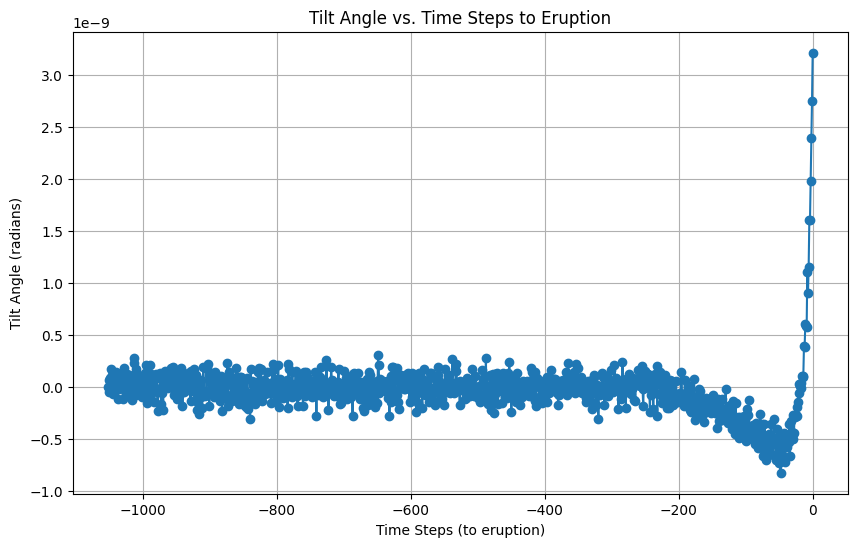

In [17]:
import matplotlib.pyplot as plt

# Converting the 'Time Step' and 'Tilt Erupt (radians)' columns to numeric for plotting
time_series_data['Time Step'] = pd.to_numeric(time_series_data['Time Step'])
time_series_data['Tilt Erupt (radians)'] = pd.to_numeric(time_series_data['Tilt Erupt (radians)'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Time Step'], time_series_data['Tilt Erupt (radians)'], marker='o', linestyle='-')
plt.title('Tilt Angle vs. Time Steps to Eruption')
plt.xlabel('Time Steps (to eruption)')
plt.ylabel('Tilt Angle (radians)')
plt.grid(True)
plt.show()


1 1


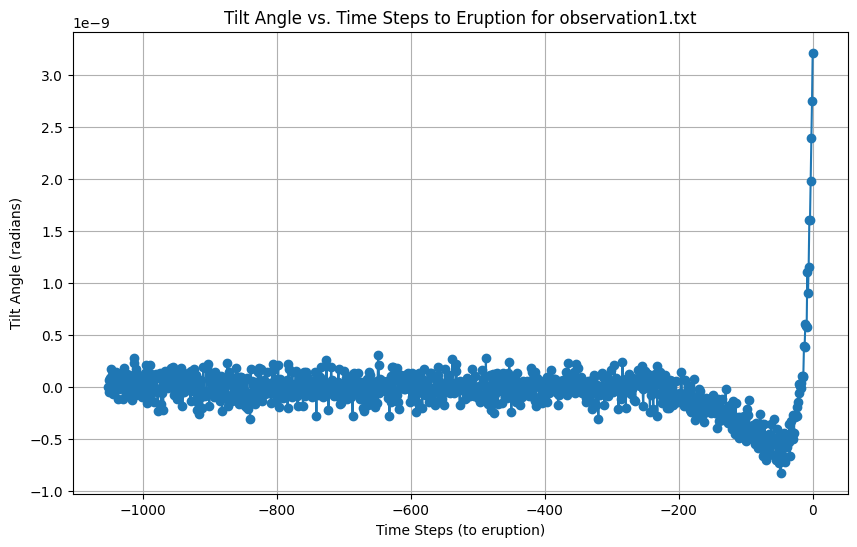

1 10


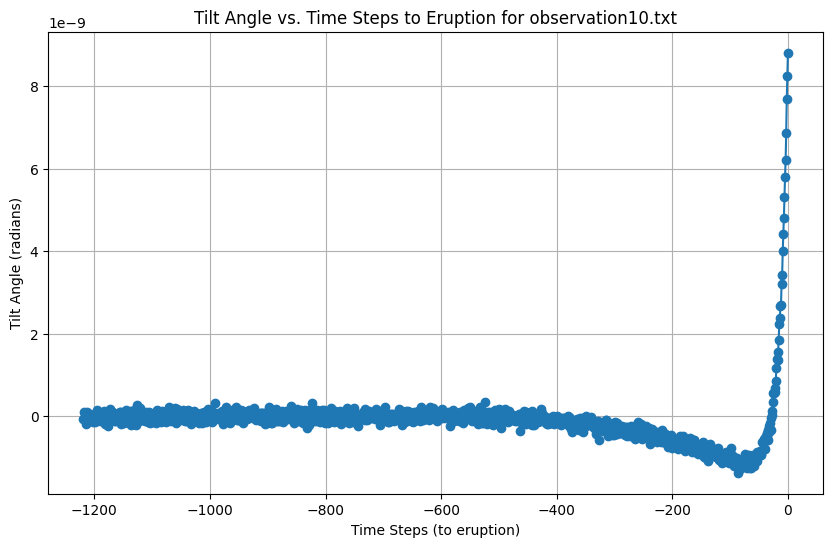

1 11


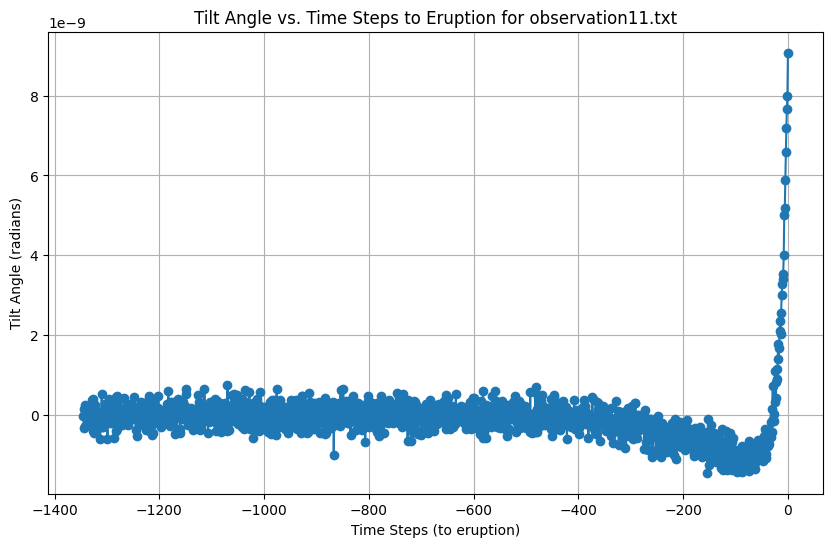

1 12


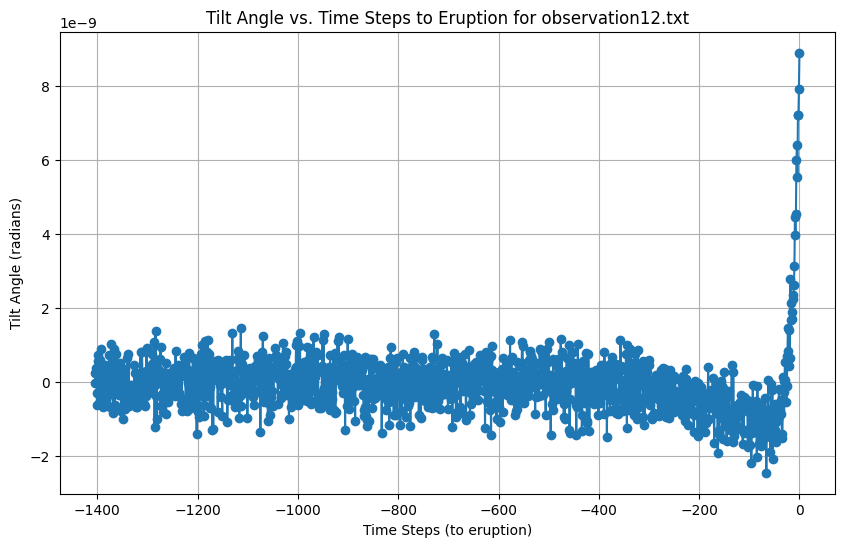

1 2


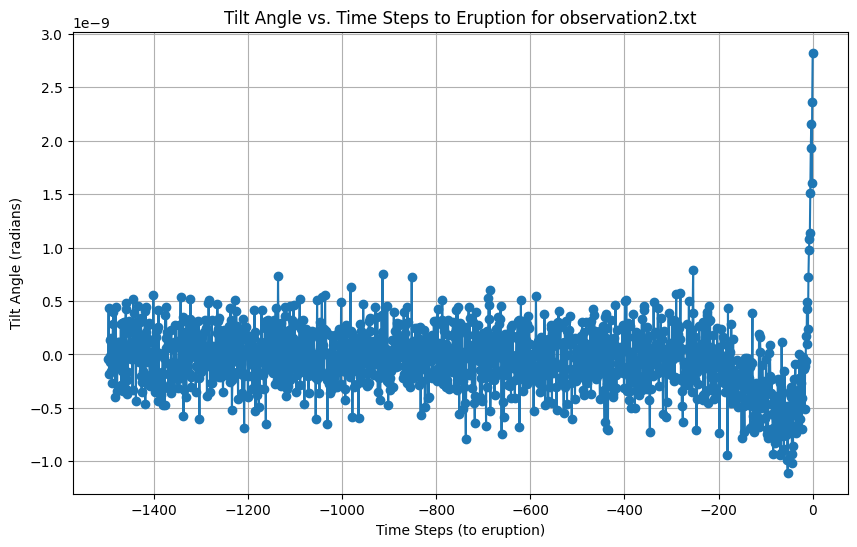

1 3


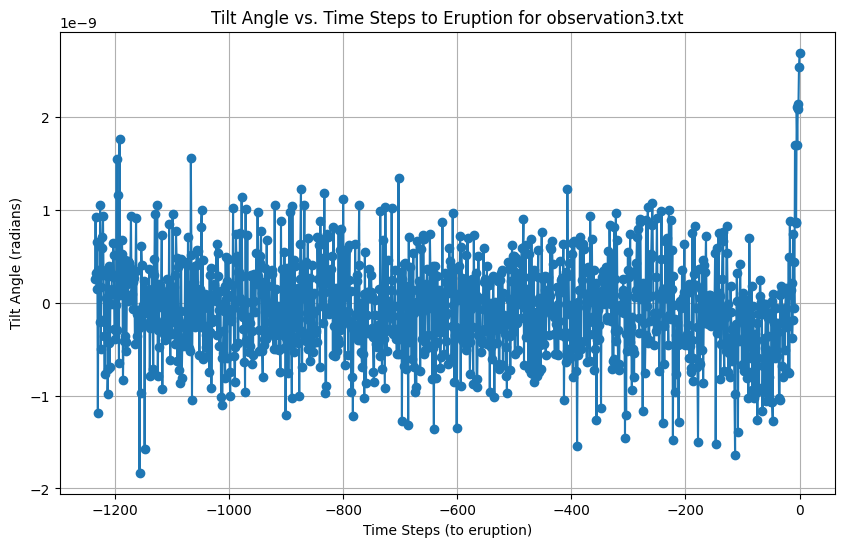

1 4


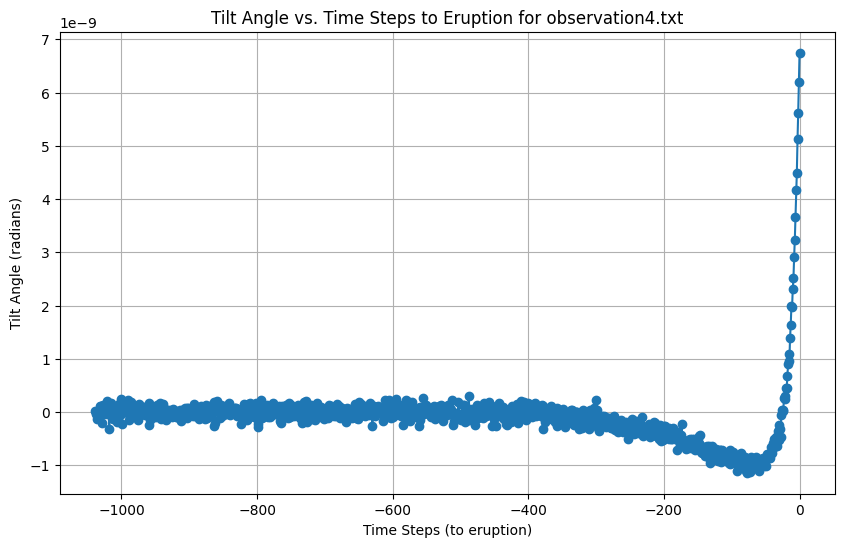

1 5


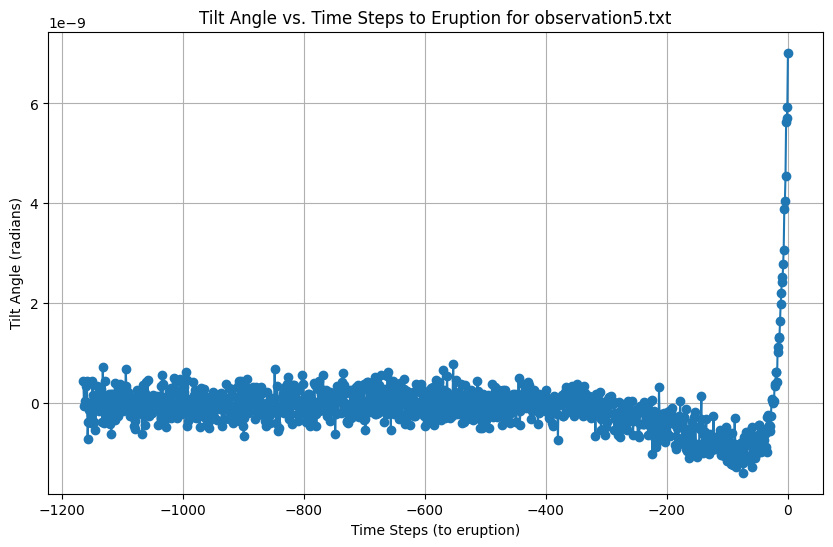

1 6


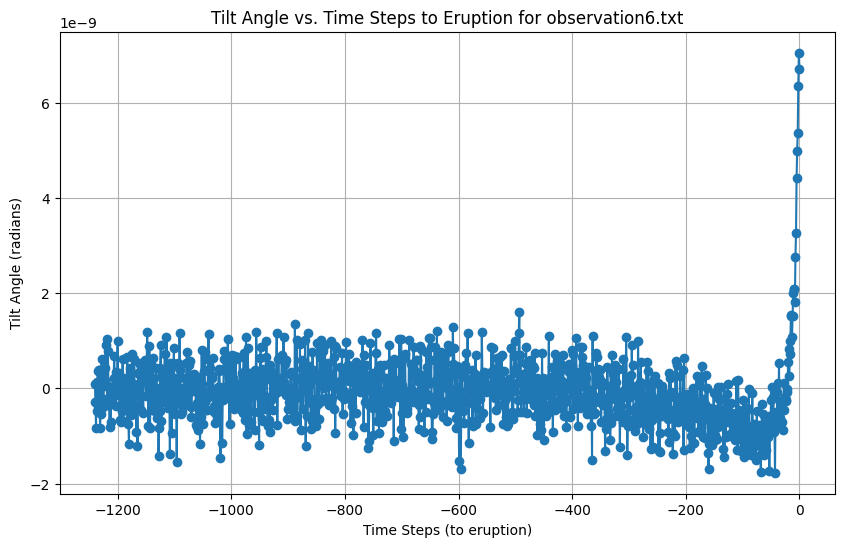

1 7


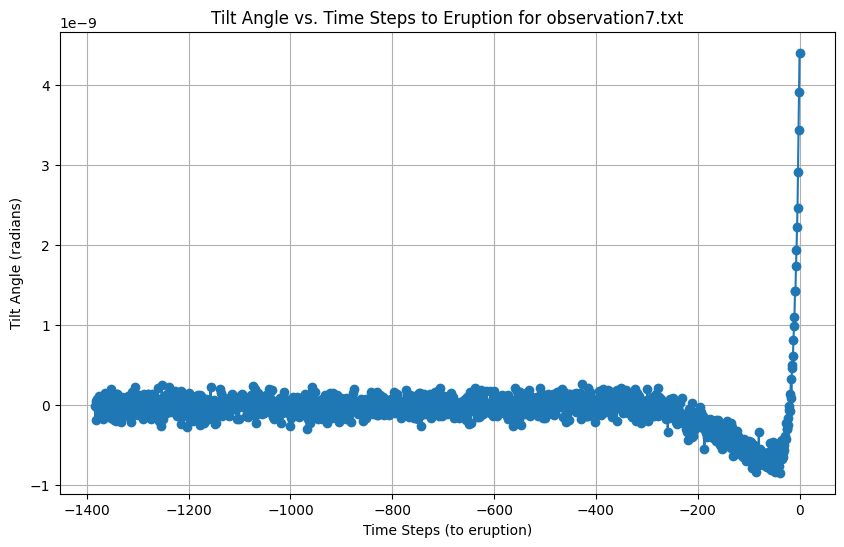

1 8


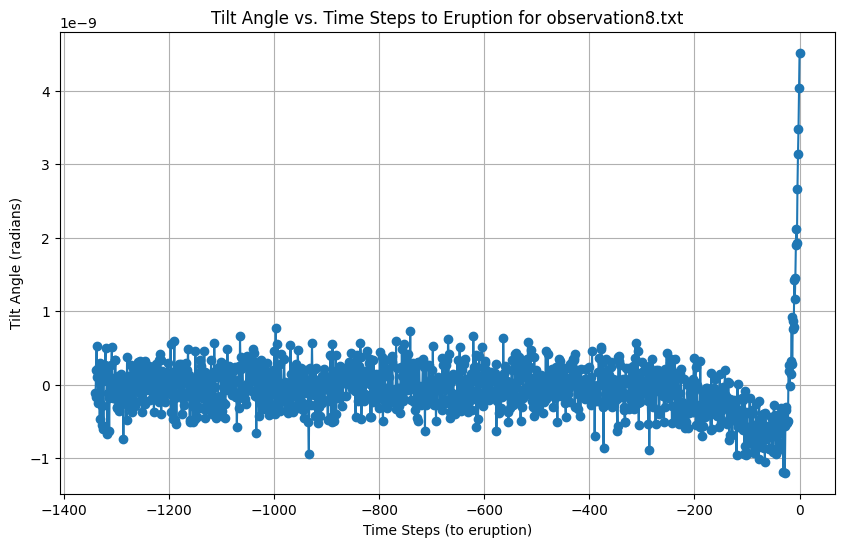

1 9


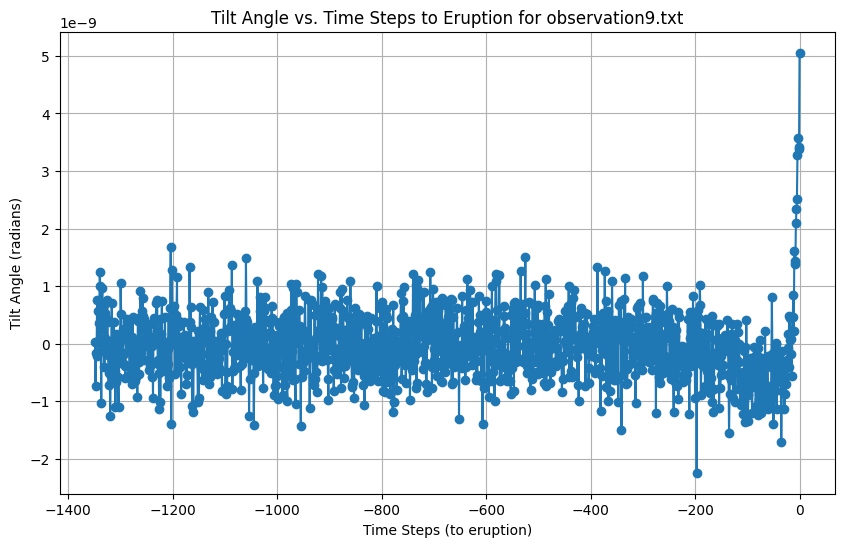

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
directory_path = 'Volcano_Dataset\\Volcano'

big_df = pd.DataFrame()


#1- Store volcano number and observation number in properties
#2-After saving time series data in datafram, assign constant values from properties dictionary
#3- Vertically Stack the temporary pandas df with the big Dataframe
for i in range(1,2):
    
    # Loop over each file in the directory
    correct_directory_path = f"{directory_path}{str(i)}"
    for filename in os.listdir(correct_directory_path):
        
        print(i,filename[11:-4])
        if filename.endswith(".txt"):
            file_path = os.path.join(correct_directory_path, filename)

            with open(file_path, 'r') as file:
                file_contents = file.read()

            # Splitting the file content into lines
            lines = file_contents.split('\n')

            # Extracting the properties
            properties = {}
            empty_line_count = 0
            for line in lines:
                if line.strip() == "":
                    empty_line_count += 1
                    if empty_line_count == 2:
                        break
                    continue
                key, value = line.split(',')
                properties[key] = value
            properties['Volcano_Number'] = i
            properties['Observation_Number'] = filename[11:-4] 
               

            # Extracting the time series data
            time_series_lines = [line for line in lines if line.strip() != ""][-2:]
            time_steps = time_series_lines[0].split(',')
            tilt_erupt_values = time_series_lines[1].split(',')

            # Creating the DataFrame
            time_series_data = pd.DataFrame({
                'Time Step': time_steps,
                'Tilt Erupt (radians)': tilt_erupt_values
            })

            #Assign static properties
            time_series_data = time_series_data.assign(**properties)

            #Vertically stack the dataframes
            big_df = pd.concat([big_df,time_series_data])

            # Converting to numeric
            time_series_data['Time Step'] = pd.to_numeric(time_series_data['Time Step'])
            time_series_data['Tilt Erupt (radians)'] = pd.to_numeric(time_series_data['Tilt Erupt (radians)'])

            # Plotting
            plt.figure(figsize=(10, 6))
            plt.plot(time_series_data['Time Step'], time_series_data['Tilt Erupt (radians)'], marker='o', linestyle='-')
            plt.title(f'Tilt Angle vs. Time Steps to Eruption for {filename}')
            plt.xlabel('Time Steps (to eruption)')
            plt.ylabel('Tilt Angle (radians)')
            plt.grid(True)
            plt.show()


In [37]:
big_df

,Time Step,Tilt Erupt (radians),v,Patm,g,r,G,rho,mu,rc,M,sigma,Volcano_Number,Observation_Number
0,-1052,-4.87775135323027e-12,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1,1,1
1,-1051,-5.41769735416295e-11,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1,1,1
2,-1050,6.28908620278579e-11,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1,1,1
3,-1049,8.04923683770754e-11,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1,1,1
4,-1048,1.69726718818826e-10,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.18,0.1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,-4,3.27533546682527e-09,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.26,0.5,1,9
1347,-3,3.57278796804224e-09,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.26,0.5,1,9
1348,-2,3.38943414742954e-09,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.26,0.5,1,9
1349,-1,3.4081938064548e-09,0.25,100000,9.81,500,10^11.12,2200,10^3.51,18,10^6.26,0.5,1,9
